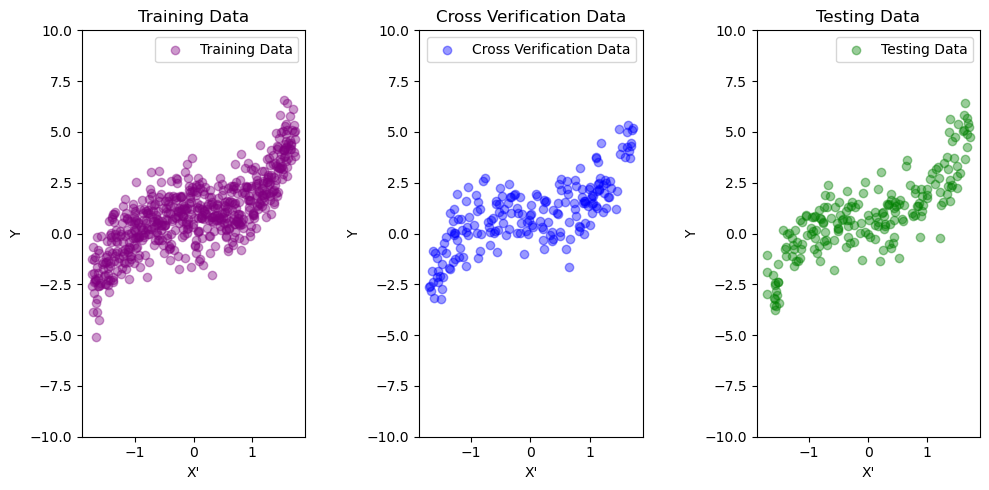

In [29]:
#TASK-1


import pandas as pd
import matplotlib.pyplot as plt

# READING DATA FROM CSV
df = pd.read_csv(r"E:\BITS\Assignments\FoDS A1\Data.csv")
#print(df)


# NORMALISING THE DATA
m = df['X'].mean()
sd = df['X'].std()
#print(m)
#print(sd)
df['X'] = (df['X'] - m)/sd
#print(df['X'].mean())
#print(df['X'].std())


# SHUFFLING AND SPLITTING INTO TRAINING AND TESTING
df = df.sample(frac=1).reset_index(drop=True)
training = df.iloc[:600].reset_index(drop=True)
cv = df.iloc[600:800].reset_index(drop=True)
testing = df.iloc[800:].reset_index(drop=True)
#print(training)
#print(testing)


# VISUALISING THE DATAPOINTS

plt.figure(figsize=(10, 5))

# Scatter Plot for Training Data
plt.subplot(1, 3, 1)
plt.scatter(training['X'], training['Y'], alpha=0.4, color='purple', label='Training Data')
plt.title('Training Data')
plt.xlabel('X\'')
plt.ylabel('Y')
plt.legend()
plt.ylim(-10,10)

# Scatter Plot for Cross Verification Data
plt.subplot(1, 3, 2)
plt.scatter(cv['X'], cv['Y'], alpha=0.4, color='blue', label='Cross Verification Data')
plt.title('Cross Verification Data')
plt.xlabel('X\'')
plt.ylabel('Y')
plt.legend()
plt.ylim(-10,10)

# Scatter Plot for Testing Data
plt.subplot(1, 3, 3)
plt.scatter(testing['X'], testing['Y'], alpha=0.4, color='green', label='Testing Data')
plt.title('Testing Data')
plt.xlabel('X\'')
plt.ylabel('Y')
plt.legend()
plt.ylim(-10,10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.51)
plt.show()

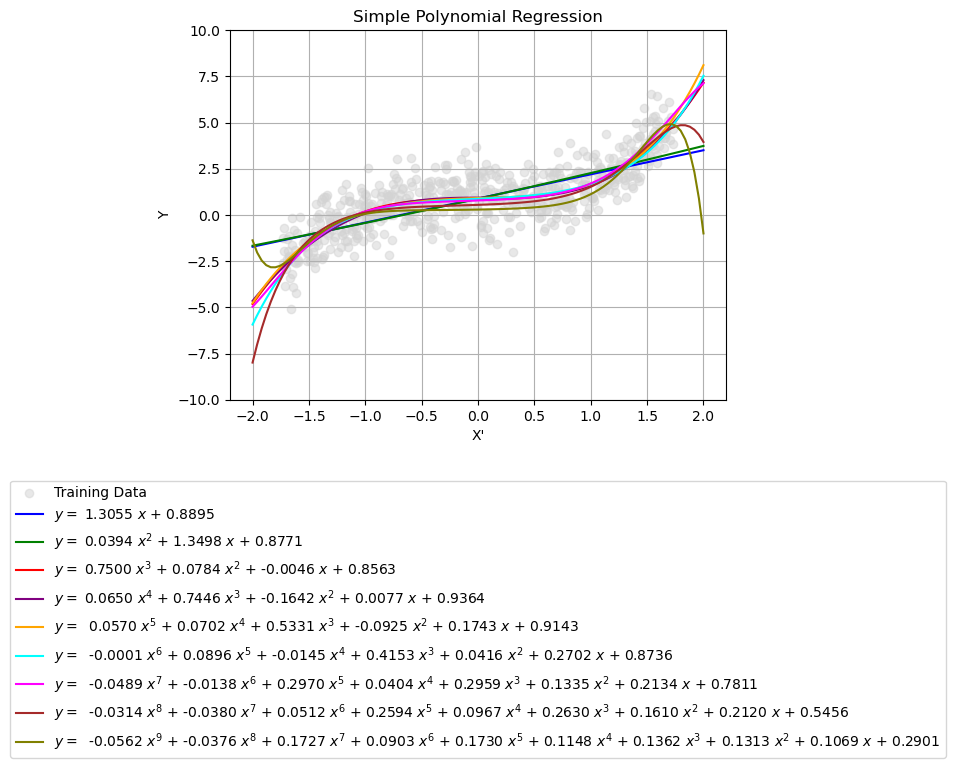

In [30]:
#SIMPLE_POLYNOMIAL_REGRESSION


import numpy as np

# INITIALIZING STARTING COEFFICIENTS FOR THE POLYNOMIALS
deg_s=[]
for i in range (2,11):
    deg_s.append([0.0]*i)
#print(deg)

# TRAINING SIMPLE REGRESSION POLYNOMIALS
eta = [0.01, 0.006, 0.003, 0.001, 0.0005, 0.0002, 0.00009, 0.00003, 0.00001] # Learning Rates for each polynomial
ind=0
for i in range (0, 500): # 500 iterations
    dele=[]
    for d in range (2,11):
        dele.append([0.0]*d) # n^th index of dele[] stores list of dele values for (n+1)^th degree polynomial
    for j in range (0, 120): # Batch size is 120
        temp = [0.0]*9
        xn = training.loc[j+ind, 'X']
        yn = training.loc[j+ind, 'Y'] 
        for p in range(2,11): # For 9 different polynomials           
            for k in range (0,p): # For each polyonmial of degree (p-1), we need to calculate the predicted value
                temp[p-2] += deg_s[p-2][k]*pow(xn,p-1-k) # To compute predicted value for a given x_n
            #print(deg[k])
            temp[p-2] -= yn # Error for a given datapoint
            for k in range(0,p):
                dele[p-2][k]+=temp[p-2]*pow(xn,p-1-k)                
    #temp = [(x*2) for x in temp] # Not required since the constant 2 can be merged into eta
    for p in range(2,11):
            for k in range (0,p):
                deg_s[p-2][k] = deg_s[p-2][k] - eta[p-2] * dele[p-2][k]
    ind = (ind + 120) % 600
    #print("ITER" + str(i+1) + ": " + str(deg1[0]) + " + " + str(deg1[1]) + "x")
#print(deg_s)


# VISUALIZATION OF THE SIMPLE REGRESSION POLYNOMIALS

polynomial=[]
y=[]
for i in range(0,9):
    polynomial.append(np.poly1d(deg_s[i]))
    x = np.linspace(-2, 2, 100)  # Range from -10 to 10 with 100 points
    y.append(polynomial[i](x))

# Plotting
plt.scatter(training['X'], training['Y'], alpha=0.5, color='lightgray', label='Training Data')
plt.plot(x, y[0], color='blue', label=f'$y = $ {deg_s[0][0]:.4f} $x$ + {deg_s[0][1]:.4f}')
plt.plot(x, y[1], color='green', label=f'$y = $ {deg_s[1][0]:.4f} $x^2$ + {deg_s[1][1]:.4f} $x$ + {deg_s[1][2]:.4f}')
plt.plot(x, y[2], color='red', label=f'$y = $ {deg_s[2][0]:.4f} $x^3$ + {deg_s[2][1]:.4f} $x^2$ + {deg_s[2][2]:.4f} $x$ + {deg_s[2][3]:.4f}')
plt.plot(x, y[3], color='purple', label=f'$y = $ {deg_s[3][0]:.4f} $x^4$ + {deg_s[3][1]:.4f} $x^3$ + {deg_s[3][2]:.4f} $x^2$ + {deg_s[3][3]:.4f} $x$ + {deg_s[3][4]:.4f}')
plt.plot(x, y[4], color='orange', label=f'$y = $  {deg_s[4][0]:.4f} $x^5$ + {deg_s[4][1]:.4f} $x^4$ + {deg_s[4][2]:.4f} $x^3$ + {deg_s[4][3]:.4f} $x^2$ + {deg_s[4][4]:.4f} $x$ + {deg_s[4][5]:.4f}')
plt.plot(x, y[5], color='cyan', label=f'$y = $  {deg_s[5][0]:.4f} $x^6$ + {deg_s[5][1]:.4f} $x^5$ + {deg_s[5][2]:.4f} $x^4$ + {deg_s[5][3]:.4f} $x^3$ + {deg_s[5][4]:.4f} $x^2$ + {deg_s[5][5]:.4f} $x$ + {deg_s[5][6]:.4f}')
plt.plot(x, y[6], color='magenta', label=f'$y = $  {deg_s[6][0]:.4f} $x^7$ + {deg_s[6][1]:.4f} $x^6$ + {deg_s[6][2]:.4f} $x^5$ + {deg_s[6][3]:.4f} $x^4$ + {deg_s[6][4]:.4f} $x^3$ + {deg_s[6][5]:.4f} $x^2$ + {deg_s[6][6]:.4f} $x$ + {deg_s[6][7]:.4f}')
plt.plot(x, y[7], color='brown', label=f'$y = $  {deg_s[7][0]:.4f} $x^8$ + {deg_s[7][1]:.4f} $x^7$ + {deg_s[7][2]:.4f} $x^6$ + {deg_s[7][3]:.4f} $x^5$ + {deg_s[7][4]:.4f} $x^4$ + {deg_s[7][5]:.4f} $x^3$ + {deg_s[7][6]:.4f} $x^2$ + {deg_s[7][7]:.4f} $x$ + {deg_s[7][8]:.4f}')
plt.plot(x, y[8], color='olive', label=f'$y = $  {deg_s[8][0]:.4f} $x^9$ + {deg_s[8][1]:.4f} $x^8$ + {deg_s[8][2]:.4f} $x^7$ + {deg_s[8][3]:.4f} $x^6$ + {deg_s[8][4]:.4f} $x^5$ + {deg_s[8][5]:.4f} $x^4$ + {deg_s[8][6]:.4f} $x^3$ + {deg_s[8][7]:.4f} $x^2$ + {deg_s[8][8]:.4f} $x$ + {deg_s[8][9]:.4f}')
plt.title('Simple Polynomial Regression')
plt.xlabel('X\'')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.ylim(-10,10)
#plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.show()








RUNNING FOR LAMBDA = 0
RUNNING FOR LAMBDA = 0.5
RUNNING FOR LAMBDA = 1
RUNNING FOR LAMBDA = 3
RUNNING FOR LAMBDA = 10
RUNNING FOR LAMBDA = 20
RUNNING FOR LAMBDA = 30


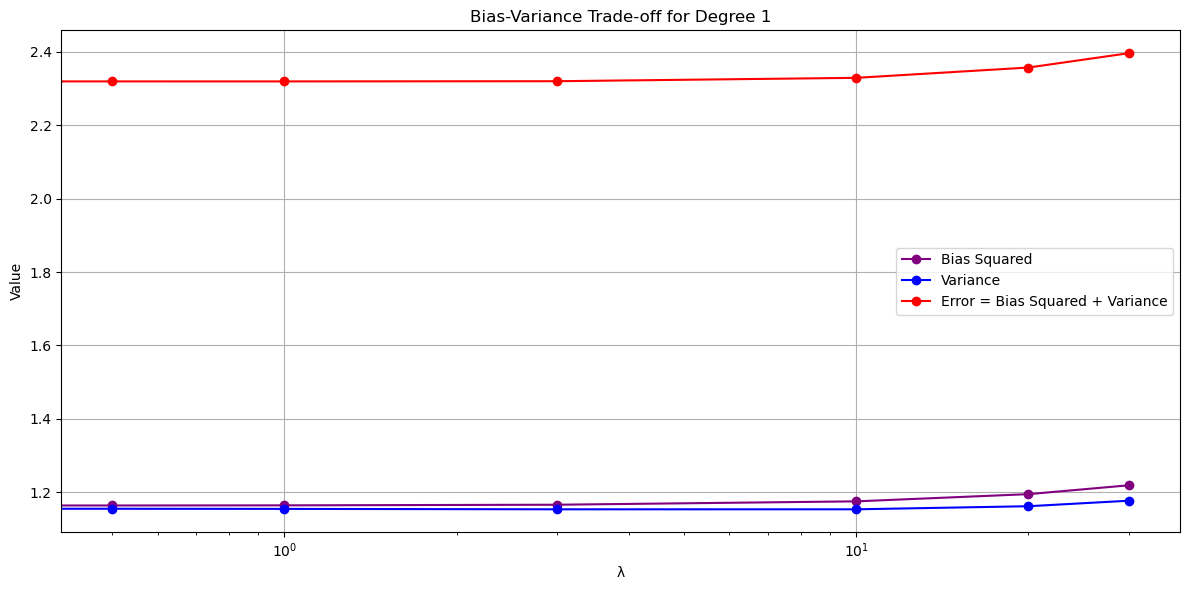

For Degree 1 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 2.3191514141496206 at LAMBDA = 1 Polynomial


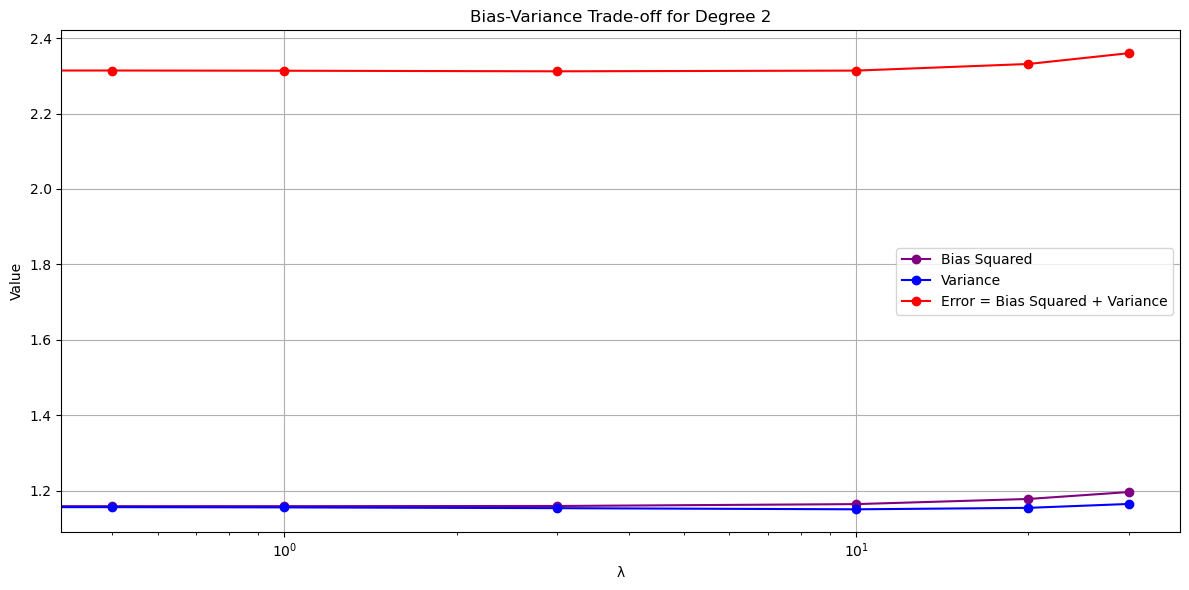

For Degree 2 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 2.3121093643033346 at LAMBDA = 3 Polynomial


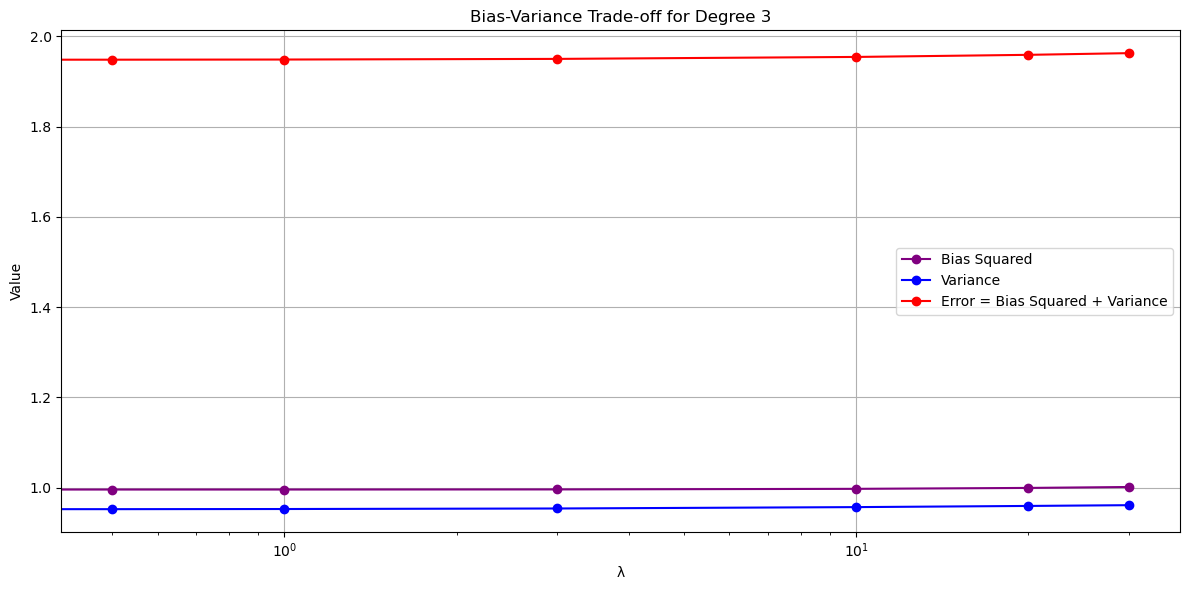

For Degree 3 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9477851493289302 at LAMBDA = 0 Polynomial


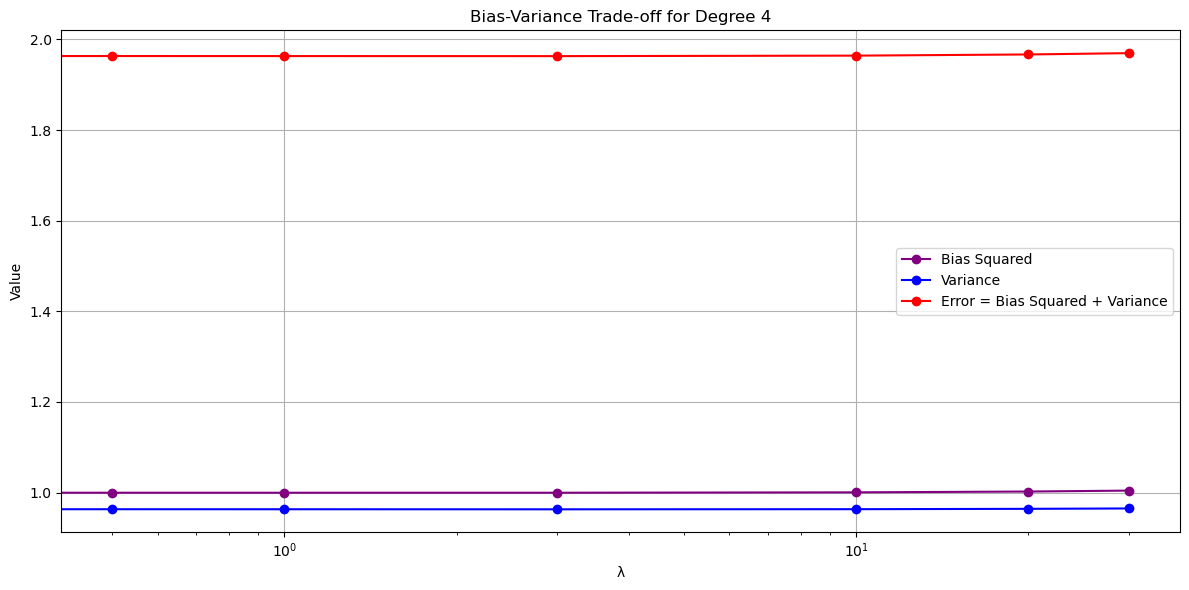

For Degree 4 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9630117504484095 at LAMBDA = 3 Polynomial


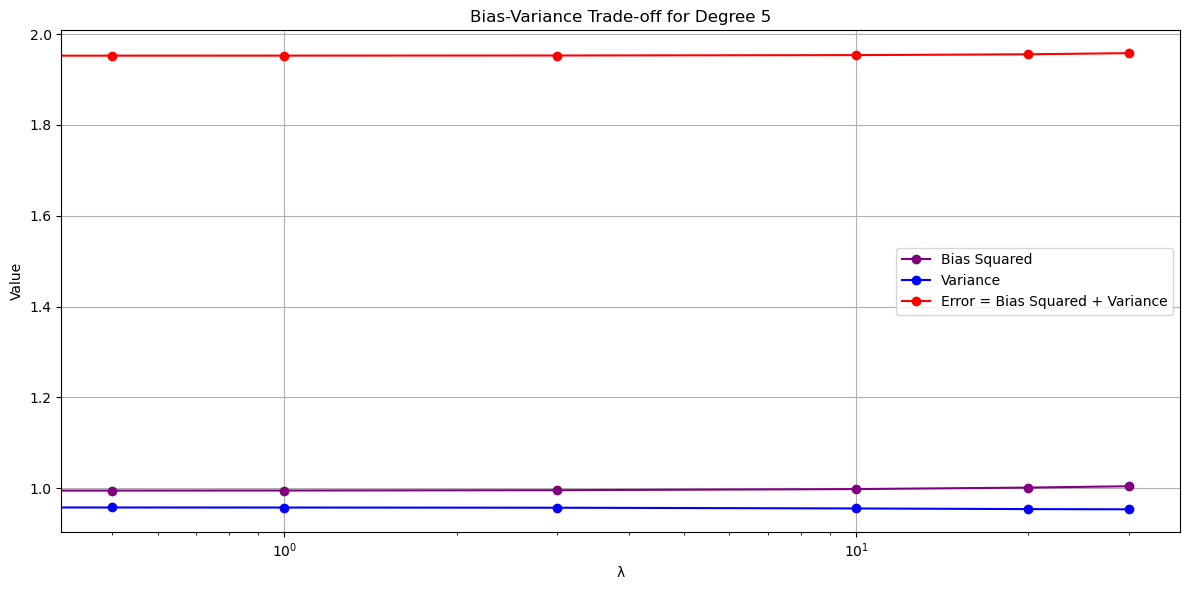

For Degree 5 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9523402779758334 at LAMBDA = 0 Polynomial


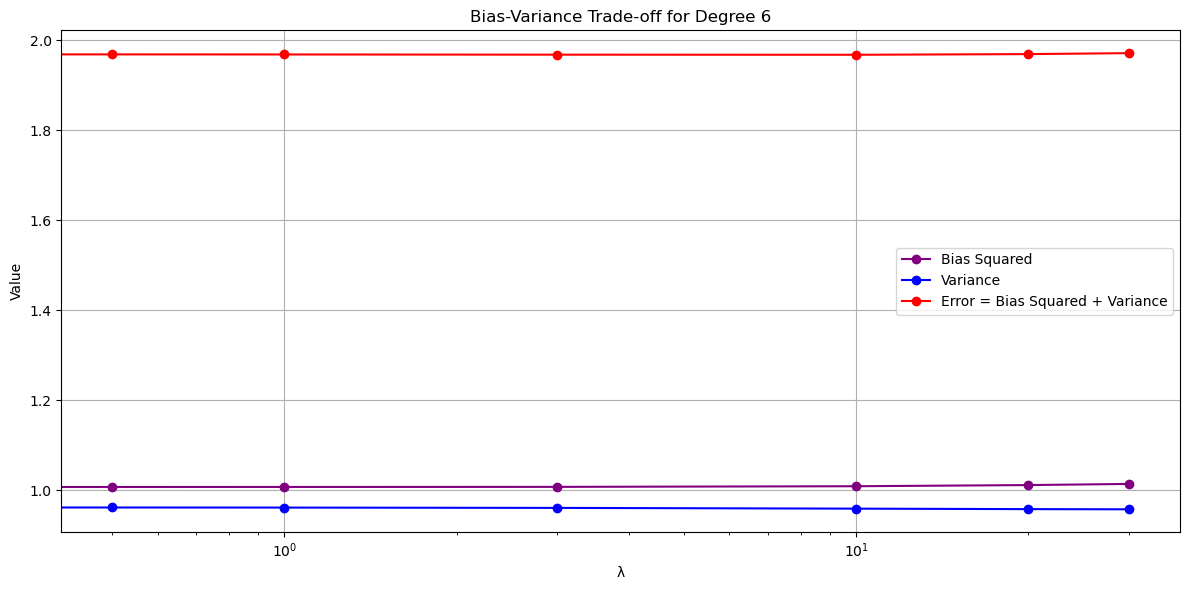

For Degree 6 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9677613241408995 at LAMBDA = 10 Polynomial


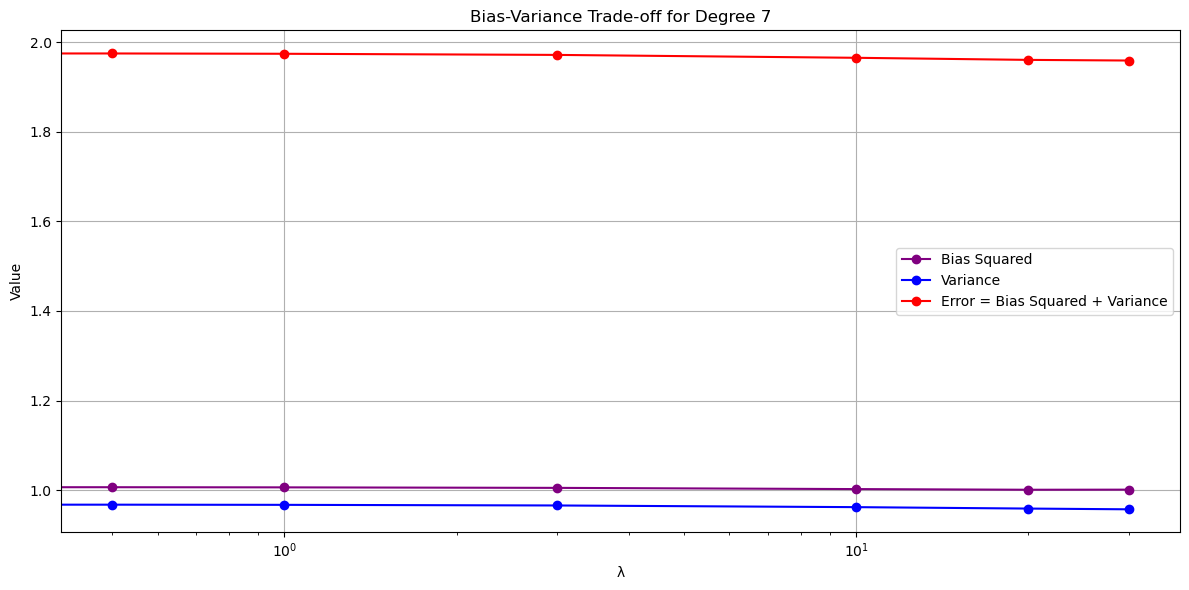

For Degree 7 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9587346531001173 at LAMBDA = 30 Polynomial


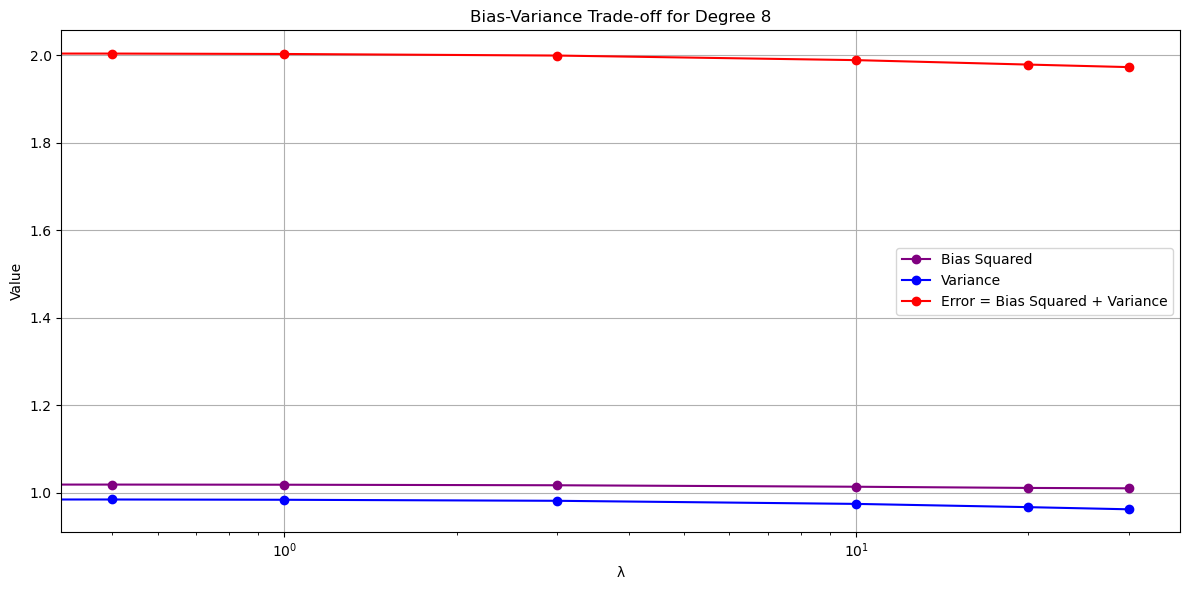

For Degree 8 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 1.9734162401924125 at LAMBDA = 30 Polynomial


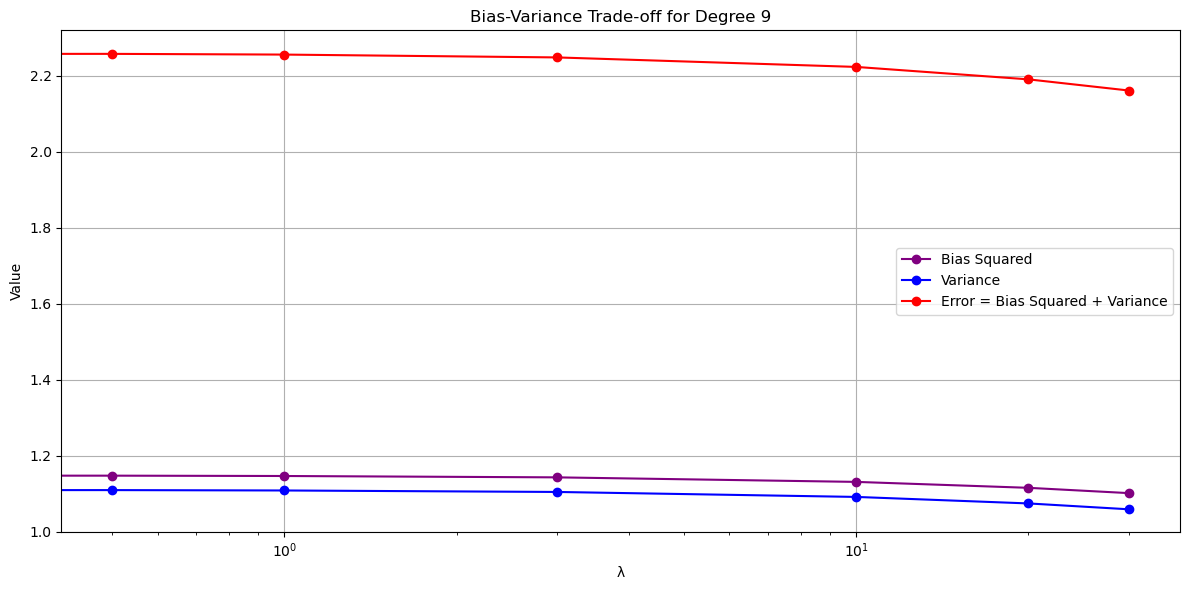

For Degree 9 polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is 2.1611435854659717 at LAMBDA = 30 Polynomial


In [31]:
#RIDGE_REGRESSION


import numpy as np

#reg_vals=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.3,1.6,2.0,2.5,3.2,4.0,5.0,6.3,7.9,10]
reg_vals = [0, 0.5, 1, 3, 10, 20, 30] # less number of Lambda values for testing
#reg_vals = [1]
BSQ = []
V = []
l2_polys = []

# TRAINING L2 REGRESSION POLYNOMIALS FOR DIFFERENT VALUES OF LAMBDA
eta = [0.01, 0.006, 0.003, 0.001, 0.0005, 0.0002, 0.00009, 0.00003, 0.00001]
ind=0
for reg in reg_vals:
    deg=[]
    for i in range (2,11):
        deg.append([1.0]*i)
    #print(deg)
    print("RUNNING FOR LAMBDA = " + str(reg))
    for i in range (0, 500):
        dele=[]
        for d in range (2,11):
            dele.append([0.0]*d) 
        for j in range (0, 120):
            temp = [0.0]*9
            xn = training.loc[j+ind, 'X']
            yn = training.loc[j+ind, 'Y'] 
            for p in range(2,11):          
                for k in range (0,p): 
                    temp[p-2] += deg[p-2][k]*pow(xn,p-1-k) 
                #print(deg[k])
                temp[p-2] -= yn 
                for k in range(0,p):
                    dele[p-2][k]+=temp[p-2]*pow(xn,p-1-k)
        for p in range(2,11):
                for k in range (0,p):
                    if(k==(p-1)):
                        deg[p-2][k] = deg[p-2][k] - eta[p-2] * dele[p-2][k] # Y-intercept is exempted from being punished for having large values
                        continue
                    deg[p-2][k] = deg[p-2][k] - eta[p-2] * (dele[p-2][k] + reg*deg[p-2][k])
        ind = (ind + 120) % 600
    l2_polys.append(deg)
    
    # BIAS COMPUTATION
    bias=[0.0]*9
    for i in range (0,600):
        xn = training.loc[i, 'X']
        yn = training.loc[i, 'Y'] 
        for p in range(2,11): # For 9 different polynomials           
            pred_val=0
            for k in range (0,p): # For a polyonmial of degree (p-1), we calculate the predicted value
                pred_val += deg[p-2][k]*pow(xn,p-1-k) 
            bias[p-2]+= pow((pred_val - yn), 2) # Accumulating Sum of Squares of Error
    for i in range (0,9):
        bias[i] = bias[i] / 600
        bias[i] = pow(bias[i],0.5)
        #print("BIAS FOR DEGREE" + str(i+1) + " is " + str(bias[i]))
    BSQ.append(bias)

    # VARIANCE COMPUTATION
    var=[0.0]*9
    for i in range (0,200):
        xn = cv.loc[i, 'X']
        yn = cv.loc[i, 'Y']
        for p in range(2,11): # For 9 different polynomials           
            pred_val=0
            for k in range (0,p): # For a polyonmial of degree (p-1), we calculate the predicted value
                pred_val += deg[p-2][k]*pow(xn,p-1-k)
            var[p-2]+= pow((pred_val - yn), 2) # Accumulating sum of Squares of Error
    for i in range (0,9):
        var[i] = var[i] / 200
        var[i] = pow(var[i],0.5)
        #print("VARIANCE FOR DEGREE" + str(i+1) + " is " + str(var[i]))
    V.append(var)


#print(l2_polys)
best_l2_polys=[]
# PLOTTING BIAS-VARIANCE TRADEOFF (SAME AS PLOT 2 IN TASK 3)
for i in range (0,9):
    #print("DEGREE " + str(i+1))
    bias_squared = np.array([row[i] for row in BSQ])
    variance = np.array([row[i] for row in V])
    error = bias_squared + variance
    mini = np.argmin(error)
    best_l2_polys.append(l2_polys[mini][i])
    #print(l2_polys[mini][i])
    plt.figure(figsize=(12, 6))
    plt.plot(reg_vals, bias_squared, color = 'purple', label='Bias Squared', marker='o')
    plt.plot(reg_vals, variance, color = 'blue', label='Variance', marker='o')
    plt.plot(reg_vals, error, color = 'red', label='Error = Bias Squared + Variance', marker='o')
    plt.xlabel('λ')
    plt.ylabel('Value')
    plt.title('Bias-Variance Trade-off for Degree ' + str(i+1))
    plt.xscale('log') 
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("For Degree " + str(i+1) + " polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is " + str(error[mini]) + " at LAMBDA = " + str(reg_vals[mini]) + " Polynomial")



    """
    # VISALIZATION
    
    polynomial=[]
    y=[]
    for i in range(0,9):
        polynomial.append(np.poly1d(deg[i]))
        x = np.linspace(-2, 2, 100)  # Range from -10 to 10 with 100 points
        y.append(polynomial[i](x))

    
    # Plotting
    plt.scatter(training['X'], training['Y'], alpha=0.5, color='lightgray', label='Training Data')
    plt.plot(x, y[0], color='blue', label=f'$y = $ {deg[0][0]:.4f} $x$ + {deg[0][1]:.4f}')
    plt.plot(x, y[1], color='green', label=f'$y = $ {deg[1][0]:.4f} $x^2$ + {deg[1][1]:.4f} $x$ + {deg[1][2]:.4f}')
    plt.plot(x, y[2], color='red', label=f'$y = $ {deg[2][0]:.4f} $x^3$ + {deg[2][1]:.4f} $x^2$ + {deg[2][2]:.4f} $x$ + {deg[2][3]:.4f}')
    plt.plot(x, y[3], color='purple', label=f'$y = $ {deg[3][0]:.4f} $x^4$ + {deg[3][1]:.4f} $x^3$ + {deg[3][2]:.4f} $x^2$ + {deg[3][3]:.4f} $x$ + {deg[3][4]:.4f}')
    plt.plot(x, y[4], color='orange', label=f'$y = $  {deg[4][0]:.4f} $x^5$ + {deg[4][1]:.4f} $x^4$ + {deg[4][2]:.4f} $x^3$ + {deg[4][3]:.4f} $x^2$ + {deg[4][4]:.4f} $x$ + {deg[4][5]:.4f}')
    plt.plot(x, y[5], color='cyan', label=f'$y = $  {deg[5][0]:.4f} $x^6$ + {deg[5][1]:.4f} $x^5$ + {deg[5][2]:.4f} $x^4$ + {deg[5][3]:.4f} $x^3$ + {deg[5][4]:.4f} $x^2$ + {deg[5][5]:.4f} $x$ + {deg[5][6]:.4f}')
    plt.plot(x, y[6], color='magenta', label=f'$y = $  {deg[6][0]:.4f} $x^7$ + {deg[6][1]:.4f} $x^6$ + {deg[6][2]:.4f} $x^5$ + {deg[6][3]:.4f} $x^4$ + {deg[6][4]:.4f} $x^3$ + {deg[6][5]:.4f} $x^2$ + {deg[6][6]:.4f} $x$ + {deg[6][7]:.4f}')
    plt.plot(x, y[7], color='brown', label=f'$y = $  {deg[7][0]:.4f} $x^8$ + {deg[7][1]:.4f} $x^7$ + {deg[7][2]:.4f} $x^6$ + {deg[7][3]:.4f} $x^5$ + {deg[7][4]:.4f} $x^4$ + {deg[7][5]:.4f} $x^3$ + {deg[7][6]:.4f} $x^2$ + {deg[7][7]:.4f} $x$ + {deg[7][8]:.4f}')
    plt.plot(x, y[8], color='olive', label=f'$y = $  {deg[8][0]:.4f} $x^9$ + {deg[8][1]:.4f} $x^8$ + {deg[8][2]:.4f} $x^7$ + {deg[8][3]:.4f} $x^6$ + {deg[8][4]:.4f} $x^5$ + {deg[8][5]:.4f} $x^4$ + {deg[8][6]:.4f} $x^3$ + {deg[8][7]:.4f} $x^2$ + {deg[8][8]:.4f} $x$ + {deg[8][9]:.4f}')
    plt.title('Ridge Regression')
    plt.xlabel('X\'')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.ylim(-10,10)
    #plt.tight_layout()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
    plt.show()
    """

#print(best_l2_polys)

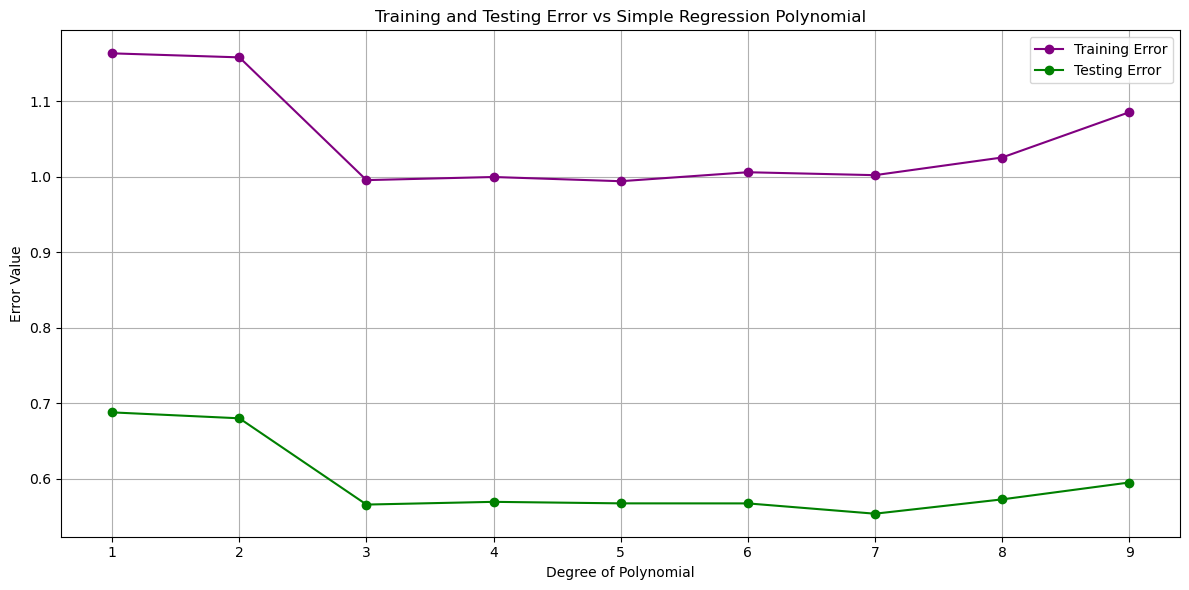

In [32]:
#TASK-3_PLOT-1

# Training Error
tr_err=[0.0]*9
for i in range (0,600):
    xn = training.loc[i, 'X']
    yn = training.loc[i, 'Y']
    for p in range(2,11): # For 9 different polynomials
        pred_val=0
        for k in range (0,p): # For a polyonmial of degree (p-1), we calculate the predicted value
            pred_val += deg_s[p-2][k]*pow(xn,p-1-k)
        tr_err[p-2]+= (pred_val - yn)**2 # Accumulating sum of Squares of Error
    #print(i)
for i in range (0,9):
    tr_err[i] = tr_err[i] / 600
    tr_err[i] = pow(tr_err[i],0.5)

# Testing Error
test_err=[0.0]*9
for i in range (0,200):
    xn = testing.loc[i, 'X']
    yn = testing.loc[i, 'Y']
    for p in range(2,11): # For 9 different polynomials           
        pred_val=0
        for k in range (0,p): # For a polyonmial of degree (p-1), we calculate the predicted value
            pred_val += deg_s[p-2][k]*pow(xn,p-1-k)
        test_err[p-2]+= (pred_val - yn)**2 # Accumulating sum of Squares of Error
for i in range (0,9):
    test_err[i] = test_err[i] / 600
    test_err[i] = pow(test_err[i],0.5)

#print(tr_err)
#print(test_err)
# Plotting
train = np.array(tr_err)
test = np.array(test_err)
plt.figure(figsize=(12, 6))
plt.plot([1,2,3,4,5,6,7,8,9], train, color = 'purple', label='Training Error', marker='o')
plt.plot([1,2,3,4,5,6,7,8,9], test, color = 'green', label='Testing Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error Value')
plt.title('Training and Testing Error vs Simple Regression Polynomial')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
#print("For Degree " + str(i+1) + " polynomial, minimum Value of BIAS SQUARED + VARIANCE (here) is " + str(error[mini]) + " at LAMBDA = " + str(reg_vals[mini]) + " Polynomial")


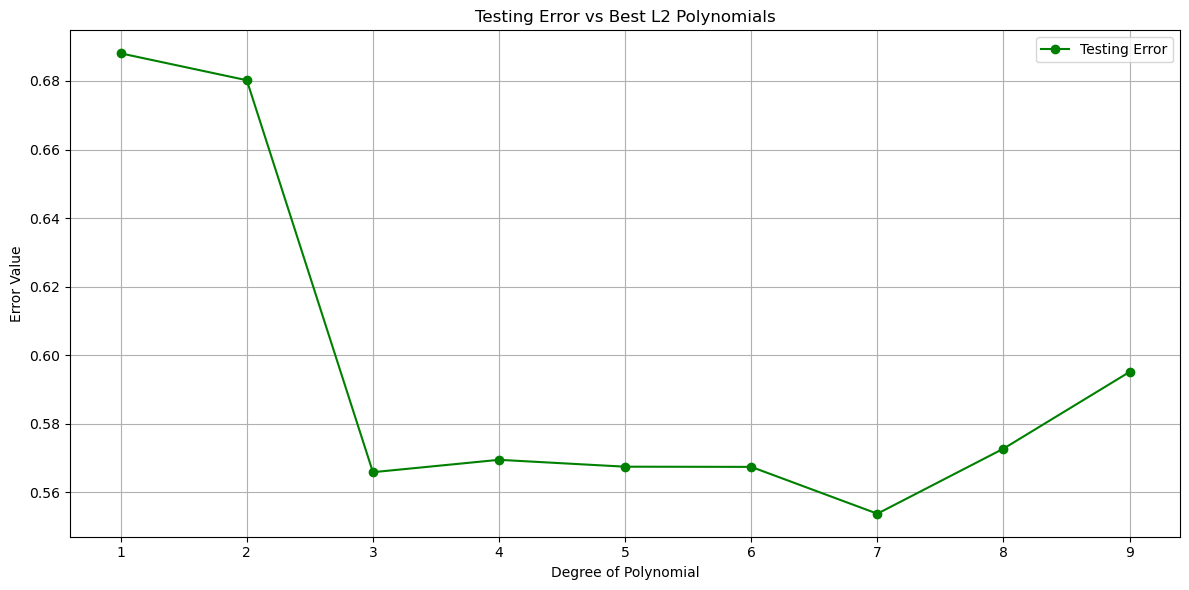

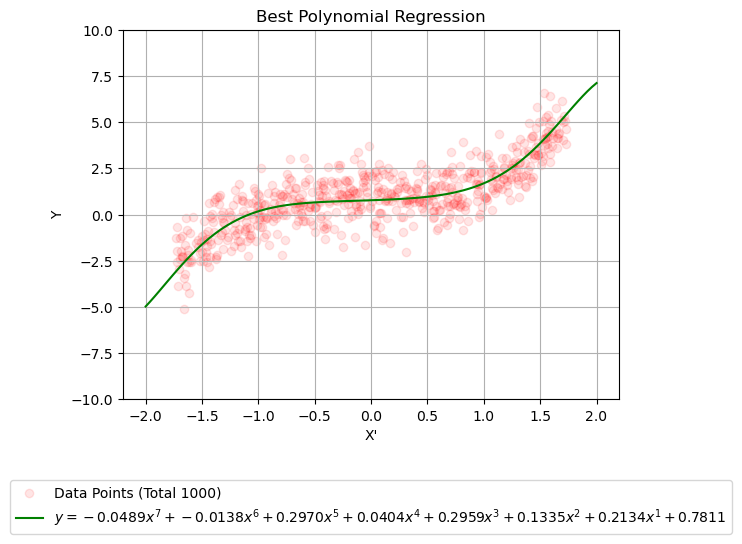

In [33]:
test_err2=[0.0]*9
for i in range (0,200):
    xn = testing.loc[i, 'X']
    yn = testing.loc[i, 'Y']
    for p in range(2,11): # For 9 different polynomials           
        pred_val=0
        for k in range (0,p): # For a polyonmial of degree (p-1), we calculate the predicted value
            pred_val += best_l2_polys[p-2][k]*pow(xn,p-1-k)
        test_err2[p-2]+= (pred_val - yn)**2 # Accumulating sum of Squares of Error
for i in range (0,9):
    test_err2[i] = test_err2[i] / 600
    test_err2[i] = pow(test_err2[i],0.5)

# Plotting
test2 = np.array(test_err2)
plt.figure(figsize=(12, 6))
plt.plot([1,2,3,4,5,6,7,8,9], test, color = 'green', label='Testing Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error Value')
plt.title('Testing Error vs Best L2 Polynomials')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

S = min(test_err)
L = min(test_err2)
s = test_err.index(S)
l = test_err2.index(L)
best_poly=[]
if(S<L or (S==L and s<=l)):
    best_poly = deg_s[s]
    z=s
else:
    best_poly = best_l2_polys[l]
    z=l


# Plotting the Best Polynomial
degree = z+1
polynomial=np.poly1d(best_poly)
x = np.linspace(-2, 2, 100)  # Range from -10 to 10 with 100 points
y=polynomial(x)
plt.scatter(training['X'], training['Y'], alpha=0.1, color='red', label='Data Points (Total 1000)')
lab = f'$y = ' + ' + '.join([f'{coef:.4f}x^{degree-i}' if i < degree else f'{coef:.4f}' for i, coef in enumerate(best_poly)]) + '$'
plt.plot(x, y, color='green',label=lab)
plt.title('Best Polynomial Regression')
plt.xlabel('X\'')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.ylim(-10,10)
#plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.show()